# Kickstartin' Success

In this study, we will explore [data](https://webrobots.io/kickstarter-datasets/) on Kickstarter projects and build a model to predict campaign success or failure as well as explore the drivingfactors.

Content:
* [Introduction](#intro)
* [Initialization](#init)
* [Predictive Model](#model)
* [Evaluation](#eval)
* [Implementation](#imple)
* [Implications](#impli)
* [Future Work](#fw)

<h4><center>...</center></h4>

<a id='intro'><h2>Introduction</h2></a>

Nowadays if you have a great idea but not the means, crowdsourcing on Kickstarter sounds compelling. However, only 44% percent of campaigns on Kickstarter reaches their funding goal. Before you jump into Kickstarter, how do you know if it's the right platform for you? What makes a successful Kickstarter campaign? What is a realistic funding goal? By leveraging the tools and power of data analytics, we seek to answer questions and build a model to predict the success (or failure) of a potential campaign.

<h2><a id='intro'>Initialization</a></h2>

In [141]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os, json
from scipy.stats import skew
from scipy.stats import ttest_ind, f_oneway, lognorm, levy, skew, chisquare
from sklearn.preprocessing import normalize, scale

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

A large dataset provided by [Web Robots](https://webrobots.io/kickstarter-datasets/) was used to train the model. The dataset contains kickstarter campaigns collected monthly through webscrapping. Each dataset is composed of all kickstarter campaigns up to a set maximum for each category. We utilized the data collected up until January 2018.

In [125]:
%%capture
# Download dataset
# Check if the dataset is present on local disk and load it
if os.path.exists('Kickstarter_2018-01.csv'):
    data = pd.read_csv('Kickstarter_2018-01.csv', error_bad_lines=False)

In [126]:
# Print the size of the dataset
print ("Number of rows:", data.shape[0])
print ("Number of columns: ", data.shape[1])

Number of rows: 194475
Number of columns:  86


<h2><a id='model'>Predictive Model</a></h2>

**Summary**

The initial dataset contained 194475 transactions with 86 time-series, categorical and numerical variables. In order to build the final model, the process is brokened down into (1) [Data cleaning](#s1), (2) [Feature engineering](#s2) (3) [Exploratory data analysis](#s3) and (4) [Building the model](#s4).

**Note:** The code to make predictions is provided in a function as success_predictor.py

<h3><a id='s1'>Data Cleaning</a></h3>

In [129]:
# define a function to clean a loaded dataset

def clean(mydata):
    
    """
    This function cleans the input dataframe mydata:
    
    input:
        mydata: pandas.dataframe
    output: 
        pandas.dataframe

    """
    
    data = mydata.copy()
    
    return data

**Let's clean the data... *scrub* *scrub* *scrub* **

In [130]:
data = clean(data)

<h3><a id='s3'>Feature Engineering</a></h3>

In [131]:
def engineer_features(mydata):
    
    data = mydata.copy()

    # create success variable (PREDICT)
    successful = data['state'] == "successful"
    failed = data['state'] == "failed"

    data = data.loc[failed | successful]

    data['success'] = data['state'].astype('category')
    data['success'] = pd.Categorical.from_array(data.success).codes
    
    return data

**Let's engineer new features!**

In [132]:
print("Data dim before feature engineering:", data.shape)
data = engineer_features(data)
print("Data dim after feature engineering:", data.shape)

Data dim before feature engineering: (194475, 86)
Data dim after feature engineering: (156668, 87)


<h3><a id='s1'>Exploratory Data Analysis</a></h3>
<br>
<center>Unsupervised learning</center>

In order to narrow our exploration. We studied the correlation and utilized clustering to investigate latent drivers that contribute to the success of a campaign.

<h4><center>...</center></h4>

**Correlation matrix** <br>
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam ultrices nisl odio, non fringilla lorem lacinia et. Cras in nibh diam. Donec bibendum eros nulla, et aliquam nunc ultricies in. Nulla ut lacinia justo. Donec sit amet efficitur nisl, sed porta odio. Donec et blandit augue.

**K-Means clustering** <br>
By studying cluster centers discover ...

<center>Understading the marketplace</center>

Throughout exploratory analysis, key understandings of Kickstarter marketplace is built.

<h4><center>...</center></h4>

**Kickstarter is predominantly domestic** <br>
Although the platform boast its global reach, 68.5% of Kickstarter's campaign creators are United States-based.

**Kickstarter is home to tech-enthusiast**<br>

In [ ]:
#distribution of campaigns by category

#campaign success by category

**Creation of campaigns varies by time** <br>
The timeline of a Kickstarter campaign where creators

<center>Finding insights that matter</center>
    
After a establishing understanding of the Kickstarter nature of campaign creators, drivers that promotes success are  determined. Potential features are studied and a t-test is performed to determine whether the feature can be used to significantly distinguish successful campaigns from failed ones.

<h4><center>...</center></h4>

**Setting the right goal is as important as you'd think** <br>
The median goal for a successful campaign from the dataset is USD 5,000 while the medial goal for failed campaigns is nearly USD 17,000. We also found that 38% of failed campaigns had a goal of over USD 50,000.

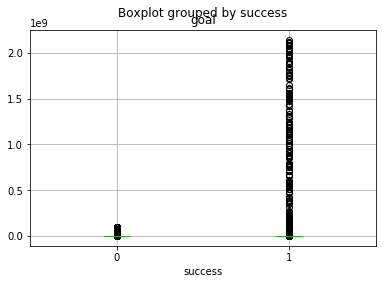

In [142]:
data.boxplot('goal',by='success')

**Staff picks have significant impact on success**<br>
Kickstarter's staff picks are given high-value front page

**Successful campaigns invest more time in creating the campaign.** <br>
The median number of days spend between creation and launch for successful campaign is

<h3><a id='s4'>Building the Model</a></h3>

In the search for the best model, four algorithms were investigated:

* Random Forest
* Adaptive Boosting
* Gradient Boosting
* Logistic Regression

These classification models were chosen due to their predictive power in binary classification problems. Adaptive and Gradient Boosting are both boosting methods which choose to train one strong learner (the overfitting decision tree) on multiple weak learners (underfitting learners) in sequence.

To avoid overfitting due to our limited dataset, functions for cross-validation and parameter optimization were defined such that they are applicable on either classification or regression algorithm

<h4><center>...</center></h4>

**K Fold Cross Validation:**

This function (**modelfit**) train the model given as 'alg' by performing cross-validation. It works on both regression and classification

* **alg**: sklearn model
* **dtrain**: pandas.DataFrame, training set
* **predictors**: list, labels of features (column names) to be used in the model training
* **target**: str, target variable
* **scoring_method**: str, method to be used by the cross-validation to valuate the model
* **performCV**: bool, perform Cv or not
* **printFeatureImportance**: bool, plot histogram of features importance or not
* **cv_folds**: int, degree of cross-validation

In [133]:
%%capture
# import scikit learn libraries
from sklearn import cross_validation, metrics   #model optimization and valuation tools
from sklearn.grid_search import GridSearchCV   #Perforing grid search

# define a function that help to train models and perform cv
def modelfit(alg,dtrain,predictors,target,scoring_method,performCV=True,printFeatureImportance=True,cv_folds=5):

    # train the algorithm on data
    alg.fit(dtrain[predictors],dtrain[target])
    
    #predict on train set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    if scoring_method == 'roc_auc':
        dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #perform cross-validation
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=cv_folds,scoring=scoring_method)
        
        #print model report
        print ("\nModel report:")
        if scoring_method == 'roc_auc':
            print ("Accuracy: %.4f" % metrics.accuracy_score(dtrain[target].values,dtrain_predictions))
            print ("AUC Score (Train): %.4f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
        if (scoring_method == 'mean_squared_error'):
            print ("Accuracy: %.4f" % metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))
    if performCV:
        print ("CV Score: Mean : %.5g | Std : %.5g | Min : %.5g | Max : %.5g \n" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #print feature importance
    if printFeatureImportance:
        if dir(alg)[0] == '_Booster': #runs only if alg is xgboost
            feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
        else:
            feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances')
        plt.ylabel('Feature Importe Score')
        plt.show()

**Optimize Number of Desicion Trees:**

This function, (**optimize_num_trees**), is used to tune paremeters of a predictive algorithm

* **alg**: sklearn model
* **param_test**: dict, parameters to be tuned
* **scoring_method**: str, method to be used by the cross-validation to valuate the model
* **train**: pandas.DataFrame, training data
* **predictors**: list, labels to be used in the model training process. They should be in the column names of dtrain
* **target**: str, target variable

In [134]:
# optimize n_estimator through grid search
def optimize_num_trees(alg,param_test,scoring_method,train,predictors,target):
    gsearch = GridSearchCV(estimator=alg, param_grid = param_test, scoring=scoring_method,n_jobs=2,iid=False,cv=5)
    gsearch.fit(train[predictors],train[target])
    
    return gsearch

# plot optimization results
def plot_opt_results(alg):
    cv_results = []
    for i in range(len(param_test['n_estimators'])):
        cv_results.append((alg.grid_scores_[i][1],alg.grid_scores_[i][0]['n_estimators']))
    cv_results = pd.DataFrame(cv_results)
    plt.plot(cv_results[1],cv_results[0])
    plt.xlabel('# trees')
    plt.ylabel('score')
    plt.title('optimization report')

### Classification Model: Gradient Boosting

* Optimized number of trees: TBD
* Optimized predictors (in order of importance):     
    1. Category.id
    2. Goal
* ROC-AUC of test: TBD

Optimizing the classifier...

Search grid results:
params (best): 50
score (best): 0.8245

Model report:
Accuracy: 0.7834
AUC Score (Train): 0.8716
CV Score: Mean : 0.82447 | Std : 0.010685 | Min : 0.80955 | Max : 0.8414 



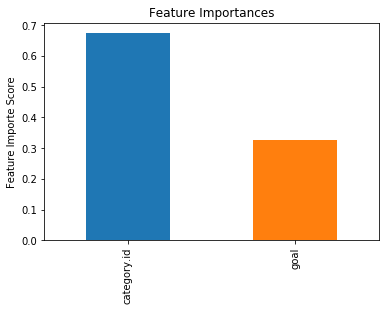


 Processing time: 0:00:05.973657


In [135]:
## OPTIMIZATION & TRAINING OF THE CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
print ("Optimizing the classifier...")

train = data.copy() # make a copy of the training set
# since the dataset is too big for my system, select a small sample size to carry on training and 5 folds cross validation
train = train.loc[np.random.choice(train.index,size=5000,replace=False)]
target = 'success' # set target variable - it will be used later in optimization

tic = dt.datetime.now() # initiate the timing
# for predictors start with candidates identified during the EDA
predictors = ['category.id',
              'goal']

# optimize n_estimator through grid search
param_test = {'n_estimators': list(range(30,151,20))} # define range over which number of trees is to be optimized

# initiate classification model
model_cls = GradientBoostingClassifier(
    learning_rate=0.1, # use default
    min_samples_split=2,# use default
    max_depth=5,
    max_features='auto',
    subsample=0.8, # try <1 to decrease variance and increase bias
    random_state = 10)

# get results of the search grid
gs_cls = optimize_num_trees(model_cls,param_test,'roc_auc',train,predictors,target)
print("\nSearch grid results:")
print("params (best):", gs_cls.best_params_['n_estimators']) 
print("score (best): %.4f" % gs_cls.best_score_)

# cross validate the best model with optimized number of estimators
modelfit(gs_cls.best_estimator_,train,predictors,target,'roc_auc')
     
print ("\n Processing time:", dt.datetime.now()-tic)

<h4><center>...</center></h4>

We now know the optimum parameter!

**Let’s test it by doing prediction on a test dataset**

In [123]:
# test
indices = data.index[~data.index.isin(train.index)]
test = data.loc[np.random.choice(indices,size=5000,replace=False)]

ypred = gs_cls.best_estimator_.predict(test[predictors])

print("ROC AUC: %.4f " % metrics.roc_auc_score(ypred,test.success))

ROC AUC: 0.7265 
